In [1]:
import pandas as pd
import konlpy
import matplotlib
import seaborn
import sklearn

print(f"pandas=={pd.__version__}")
print(f"konlpy=={konlpy.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={seaborn.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

pandas==1.2.4
konlpy==0.5.2
matplotlib==3.3.4
seaborn==0.11.1
scikit-learn==0.24.1


**데이터셋 구성**  

info: 에세이 기본 정보  
1.1. essay_id: 에세이 아이디  
1.2. essay_type: 에세이 유형  
1.3. essay_main_subject: 에세이 주제  
1.4. essay_level: 에세이 난이도  
1.5. essay_prompt: 에세이 프롬프트  
1.6. essay_len: 에세이 글자수  
  
student: 에세이 작성자 정보  
2.1. student_grade_group: 학생 학년군  
2.2. student_grade: 학생 학년  
2.3. student_reading: 학생이 일주일 간 읽은 책의 양  
2.4. student_educated: 학생의 논술 사교육 유무  
2.5. date: 에세이 수집일  
2.6. location: 에세이 수집 장소  
  
paragraph: 에세이 문단별 정보 목록  
3.1. paragraph_id: 문단 아이디  
3.2. paragraph_txt: 문단 텍스트  
3.3. paragraph_len: 문단 글자수  
  
score: 에세이 점수 정보  
4.1. essay_scoreT: 3명의 평가자 에세이 총점 목록  
4.2. essay_scoreT_avg: 3명의 평가자 에세이 총점 평균  
4.3. essay_scoreT_detail: 항목별 세부 점수  
4.3.1. essay_scoreT_exp: 표현 점수 목록  
4.3.2. essay_scoreT_org: 구성 점수 목록  
4.3.3. essay_scoreT_cont: 내용 점수 목록  
4.4. paragraph_score: 문단별 점수 정보  
  
rubric: 루브릭 정보  
5.1. rubric_essay_type: 에세이 유형  
5.2. rubric_essay_main_subject: 에세이 주제  
5.3. rubric_essay_grade: 에세이 작성자 학년  
  
expression_weight: 루브릭 표현 가중치 정보  
6.1. exp: 대분류 표현 가중치  
6.2. exp_grammar: 문법 가중치  
6.3. exp_vocab: 단어 가중치  
6.4. exp_style: 문장 표현 가중치  
  
organization_weight: 루브릭 구성 가중치 정보  
7.1. org: 대분류 구성 가중치  
7.2. org_essay: 문단 간 가중치  
7.3. org_paragraph: 문단 내 가중치  
7.4. org_coherence: 일관성 가중치  
7.5. org_quantity: 분량 가중치  
  
content_weight: 루브릭 내용 가중치 정보  
8.1. con: 대분류 내용 가중치  
8.2. con_clearance: 주제 명료성 가중치  
8.3. con_novelty: 참신성 가중치  
8.4. con_prompt: 프롬프트 독해력 가중치  
8.5. con_description: 서술력 가중치  

In [2]:
import os
import json
import pandas as pd

# 데이터를 저장할 리스트
data = []

folder_path = r"C:\Users\LEEYEJI\Downloads\과제\라벨링데이터"

# os.walk를 사용하여 모든 하위 폴더와 파일을 순회
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith('.json'):
            file_path = os.path.join(root, file_name)
            
            with open(file_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
            
            # "student_grade"가 "고등_2학년"인 경우에만 데이터 추출
            if json_data["student"]["student_grade"] == "고등_2학년":
                # 각 문단별 정보 추출
                for paragraph in json_data["paragraph"]:
                    data.append({
                        # info: 에세이 기본 정보
                        "essay_id": json_data["info"].get("essay_id"),  # 에세이 아이디
                        "essay_type": json_data["info"].get("essay_type"),  # 에세이 유형
                        "essay_main_subject": json_data["info"].get("essay_main_subject"),  # 에세이 주제
                        "essay_level": json_data["info"].get("essay_level"),  # 에세이 난이도
                        "essay_prompt": json_data["info"].get("essay_prompt"),  # 에세이 프롬프트
                        "essay_len": json_data["info"].get("essay_len"),  # 에세이 글자수
                        
                        # student: 에세이 작성자 정보
                        "student_grade_group": json_data["student"].get("student_grade_group"),  # 학생 학년군
                        "student_grade": json_data["student"].get("student_grade"),  # 학생 학년
                        "student_reading": json_data["student"].get("student_reading"),  # 학생이 일주일 간 읽은 책의 양
                        "student_educated": json_data["student"].get("student_educated"),  # 학생의 논술 사교육 유무
                        "date": json_data["student"].get("date"),  # 에세이 수집일
                        "location": json_data["student"].get("location"),  # 에세이 수집 장소
                        
                        # paragraph: 에세이 문단별 정보 목록
                        "paragraph_id": paragraph.get("paragraph_id"),  # 문단 아이디, unique()로 확인해보니 모든 데이터가 다 1임.
                        "paragraph_txt": paragraph.get("paragraph_txt"),  # 문단 텍스트
                        "paragraph_len": paragraph.get("paragraph_len"),  # 문단 글자수
                        
                        # score: 에세이 점수 정보
                        "essay_scoreT": json_data["score"].get("essay_scoreT"),  # 3명의 평가자 에세이 총점 목록
                        "essay_scoreT_avg": json_data["score"].get("essay_scoreT_avg"),  # 3명의 평가자 에세이 총점 평균
                        
                        # essay_scoreT_detail: 항목별 세부 정보
                        "essay_scoreT_exp": json_data["score"]["essay_scoreT_detail"].get("essay_scoreT_exp"),  # 표현 점수 목록
                        "essay_scoreT_org": json_data["score"]["essay_scoreT_detail"].get("essay_scoreT_org"),  # 구성 점수 목록
                        "essay_scoreT_cont": json_data["score"]["essay_scoreT_detail"].get("essay_scoreT_cont"),  # 내용 점수 목록
                        
                        # paragraph_score: 문단별 점수 정보
                        "paragraph_score": json_data["score"].get("paragraph_score"),  # 문단별 점수 정보
                        
                        # rubric: 루브릭 정보
                        "rubric_essay_type": json_data["rubric"].get("essay_type"),  # 에세이 유형
                        "rubric_essay_main_subject": json_data["rubric"].get("essay_main_subject"),  # 에세이 주제
                        "rubric_essay_grade": json_data["rubric"].get("essay_grade"),  # 에세이 작성자 학년
                        
                        # expression_weight: 루브릭 표현 가중치 정보
                        "exp": json_data["rubric"]["expression_weight"].get("exp"),  # 대분류 표현 가중치
                        "exp_grammar": json_data["rubric"]["expression_weight"].get("exp_grammar"),  # 문법 가중치
                        "exp_vocab": json_data["rubric"]["expression_weight"].get("exp_vocab"),  # 단어 가중치
                        "exp_style": json_data["rubric"]["expression_weight"].get("exp_style"),  # 문장표현 가중치
                        
                        # organization_weight: 루브릭 구성 가중치 정보
                        "org": json_data["rubric"]["organization_weight"].get("org"),  # 대분류 구성 가중치
                        "org_essay": json_data["rubric"]["organization_weight"].get("org_essay"),  # 문단 간 가중치
                        "org_paragraph": json_data["rubric"]["organization_weight"].get("org_paragraph"),  # 문단 내 가중치
                        "org_coherence": json_data["rubric"]["organization_weight"].get("org_coherence"),  # 일관성 가중치
                        "org_quantity": json_data["rubric"]["organization_weight"].get("org_quantity"),  # 분량 가중치
                        
                        # content_weight: 루브릭 내용 가중치 정보
                        "con": json_data["rubric"]["content_weight"].get("con"),  # 대분류 내용 가중치
                        "con_clearance": json_data["rubric"]["content_weight"].get("con_clearance"),  # 주제 명료성 가중치
                        "con_novelty": json_data["rubric"]["content_weight"].get("con_novelty"),  # 참신성 가중치
                        "con_prompt": json_data["rubric"]["content_weight"].get("con_prompt"),  # 프롬프트 독해력 가중치
                        "con_description": json_data["rubric"]["content_weight"].get("con_description"),  # 서술력 가중치
                    })

df = pd.DataFrame(data)

# 중복된 행 제거
df = df.drop_duplicates(subset='essay_id', keep='first')

df.to_csv('essay.csv', index=False, encoding='utf-8')

df = pd.read_csv('essay.csv', encoding='utf-8')

print(df.head())
print(df.info())

      essay_id essay_type essay_main_subject  essay_level  \
0  ESSAY_34071        글짓기       우주에 대한 나의 생각            2   
1  ESSAY_35733        글짓기       우주에 대한 나의 생각            2   
2  ESSAY_35734        글짓기       우주에 대한 나의 생각            2   
3  ESSAY_35735        글짓기       우주에 대한 나의 생각            2   
4  ESSAY_35736        글짓기       우주에 대한 나의 생각            2   

                                        essay_prompt  essay_len  \
0   여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...        840   
1   여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...       1211   
2   여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...        662   
3   여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...       1019   
4   여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...        715   

  student_grade_group student_grade  student_reading  student_educated  ...  \
0                  고등        고등_2학년                2              True  ...   
1                  고등        고등_2학년                1              True  

In [3]:
df.iloc[0]

essay_id                                                           ESSAY_34071
essay_type                                                                 글짓기
essay_main_subject                                                우주에 대한 나의 생각
essay_level                                                                  2
essay_prompt                  여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...
essay_len                                                                  840
student_grade_group                                                         고등
student_grade                                                           고등_2학년
student_reading                                                              2
student_educated                                                          True
date                                                                2021.08.15
location                                                                    51
paragraph_id                                        

In [4]:
import pandas as pd
from konlpy.tag import Okt
import re

korean_stopwords = [
    "의", "가", "이", "은", "는", "들", "을", "를", "에", "와", "과"
]

# 텍스트 정규화 함수
def normalize_text(text):
    # 1. 숫자와 특수기호 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 2. 중복된 공백 제거
    text = re.sub(r'\s+', ' ', text)
    
    # 3. 공백 앞뒤 여백 제거
    text = text.strip()
    
    return text

df = pd.read_csv('essay.csv', encoding='utf-8')

# 형태소 분석기
okt = Okt()

# 문단별로 분석 결과를 저장할 리스트 초기화
statistics = []

# 데이터프레임의 각 문단에 대해 통계 분석 수행
for index, row in df.iterrows():
    # 문단 텍스트
    paragraph_txt = row['paragraph_txt']
    
    # '#@문장구분#' 제거한 텍스트 (cleaned_text용)
    cleaned_text = paragraph_txt.replace('#@문장구분#', '')
    
    # 문장 수: '#@문장구분#'을 기준으로 분리 (문장구분 횟수 = 구분자 개수)
    sentence_count = paragraph_txt.count('#@문장구분#')
    
    # 정규화된 텍스트
    normalized_text = normalize_text(cleaned_text)
    
    # 형태소 분석
    pos_tags = okt.pos(normalized_text)
    
    # 전체 형태소 수
    word_count = len(pos_tags)
    
    # 고유 형태소 수
    unique_word_count = len(set([word for word, pos in pos_tags]))
    
    # 불용어 제거
    filtered_words = [word for word, pos in pos_tags if word not in korean_stopwords]
    
    # 불용어 제거 후 텍스트
    cleaned_text = " ".join(filtered_words)
    
    statistics.append({
        'essay_id': row['essay_id'],
        'word_count': word_count,
        'sentence_count': sentence_count,
        'unique_word_count': unique_word_count,
        'cleaned_text': cleaned_text
    })

stats_df = pd.DataFrame(statistics)

print(stats_df.head())
print(stats_df.info())

df_merge = pd.merge(df, stats_df, on=['essay_id'], how='left')

print(df_merge.head())
print(df_merge.info())

      essay_id  word_count  sentence_count  unique_word_count  \
0  ESSAY_34071         308              18                172   
1  ESSAY_35733         389              29                211   
2  ESSAY_35734          49               4                 46   
3  ESSAY_35735         365              23                208   
4  ESSAY_35736         260              13                153   

                                        cleaned_text  
0  우주 우주 모든 물질 복사 포함 하는 공간 시간 전체 이다 우주 라는 말 시공 뜻 ...  
1  어느 고요한 상태 자아 번득 나타났다 상태 무 상태 이며 들리지도 보이지 도 만져지...  
2  우주 말로 할수 없을 만큼 넒 고 큰 존재 이다 그리고 호기심 자극시키고 한 번 가...  
3  우주 대하 여 생각 해본 적 있나요 과연 우주 어떻게 탄생 하였고 어떤 모습 하고 ...  
4  금가루 뿌린 벨벳 천 본적 있어 부드럽게 펼쳐진 칡혹 사이사이 자신 존재 뽐내는 금...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   essay_id           3085 non-null   object
 1   word_count         3085 non

In [5]:
df_merge.iloc[0]

essay_id                                                           ESSAY_34071
essay_type                                                                 글짓기
essay_main_subject                                                우주에 대한 나의 생각
essay_level                                                                  2
essay_prompt                  여러분은 '우주'라는 것에 대해 어떻게 생각하나요?\n\n 한 번도 생각해보지 않...
essay_len                                                                  840
student_grade_group                                                         고등
student_grade                                                           고등_2학년
student_reading                                                              2
student_educated                                                          True
date                                                                2021.08.15
location                                                                    51
paragraph_id                                        

두 변수 간의 상관관계나 분포 패턴을 쉽게 파악할 수 있도록 산점도

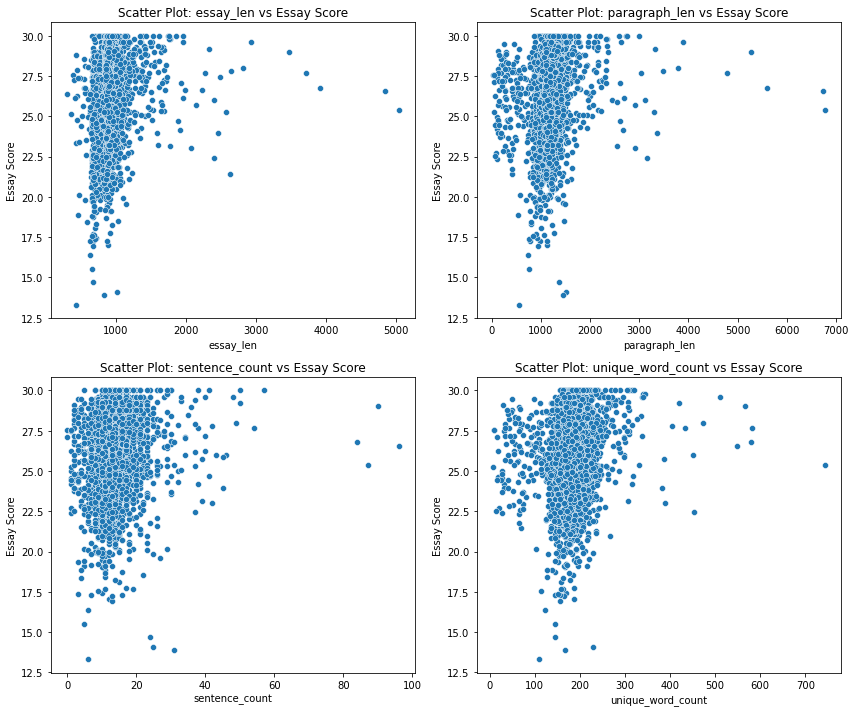

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'essay_len', 'paragraph_len', 'sentence_count', 'unique_word_count'
]

plt.figure(figsize=(12, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2x2 배열로 산점도를 배치
    sns.scatterplot(x=df_merge[column], y=df_merge['essay_scoreT_avg'])
    plt.title(f'Scatter Plot: {column} vs Essay Score')
    plt.xlabel(column)
    plt.ylabel('Essay Score')

plt.tight_layout()  # 그래프 간격을 자동으로 조정
plt.show()

**수치형 변수 (numeric_features)**  
essay_len : 에세이 글자수.  
paragraph_len : 문단 글자수.  
sentence_count : 문장 수.  
unique_word_count : 고유 단어 수.  

**범주형 변수 (categorical_features)**  
essay_level : 에세이 난이도.  
essay_type : 에세이 유형.  
student_reading : 학생이 일주일 동안 읽은 책의 양.  
exp : 대분류 표현 가중치.  
exp_vocab : 단어 가중치.  
exp_style : 문장 표현 가중치.  
org : 대분류 구성 가중치.  
org_coherence : 일관성 가중치.  
con_clearance : 주제 명료성 가중치.  
con_prompt : 프롬프트 독해력 가중치.  
con_description : 서술력 가중치.  

**타겟 변수 (y)**  
essay_scoreT_avg : 3명의 평가자에 의해 매겨진 에세이 총점의 평균값.  

In [7]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

categorical_features = ['essay_level', 'essay_type', 'student_reading', 'exp', 'exp_vocab', 'exp_style', 'org', 'org_coherence', 'con_clearance', 'con_prompt', 'con_description']
numeric_features = ['essay_len', 'paragraph_len', 'sentence_count', 'unique_word_count']

X = df_merge[categorical_features + numeric_features]

y = df_merge['essay_scoreT_avg']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], 
)

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "ElasticNet": ElasticNet(random_state=42)
}

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error on Test Set: {mse}")
    
    cv_scores = cross_val_score(model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} - 교차 검증 MSE 점수: {-cv_scores}")
    print(f"{model_name} - 평균 MSE: {-cv_scores.mean()}")
    print(f"{model_name} - MSE 표준 편차: {cv_scores.std()}")
    print("=" * 50)

Linear Regression - Mean Squared Error on Test Set: 5.760723163039085
Linear Regression - 교차 검증 MSE 점수: [7.82096120e+26 6.15855150e+00 6.08673648e+00 5.47128142e+00
 2.10477402e+27]
Linear Regression - 평균 MSE: 5.7737402754417415e+26
Linear Regression - MSE 표준 편차: 8.215770404649637e+26
Random Forest Regressor - Mean Squared Error on Test Set: 6.014916858258301
Random Forest Regressor - 교차 검증 MSE 점수: [9.28936952 6.8233651  7.58366666 5.68568153 5.61588847]
Random Forest Regressor - 평균 MSE: 6.999594256423767
Random Forest Regressor - MSE 표준 편차: 1.3606084246235541
Support Vector Regressor - Mean Squared Error on Test Set: 5.954786481956479
Support Vector Regressor - 교차 검증 MSE 점수: [6.58372092 5.9387208  6.54238548 6.30230267 4.92804223]
Support Vector Regressor - 평균 MSE: 6.059034419822913
Support Vector Regressor - MSE 표준 편차: 0.610200345894416
ElasticNet - Mean Squared Error on Test Set: 6.525460405358764
ElasticNet - 교차 검증 MSE 점수: [5.95518742 5.43210234 7.75349491 5.06006067 5.44983735]
El